In [1]:
import numpy as np
import mygraph as mg

Коэффиценты прямой: k, s_k, b, s_b
114.0	4.301162633521313	-15.0	6.800735254367722
Lambda, last_k = 0.0015719298245614037, 114.0
v = 1564.0701754385966
Коэффиценты прямой: k, s_k, b, s_b
240.0	0.0	0.0	0.0
Lambda, last_k = 0.0007466666666666667, 240.0
v = 1463.466666666667
Коэффиценты прямой: k, s_k, b, s_b
200.0	0.0	0.0	0.0
Lambda, last_k = 0.000896, 200.0
v = 1361.92
Коэффиценты прямой: k, s_k, b, s_b
168.0	2.0	0.0	3.1622776601683795
Lambda, last_k = 0.0010666666666666667, 168.0
v = 1269.3333333333333


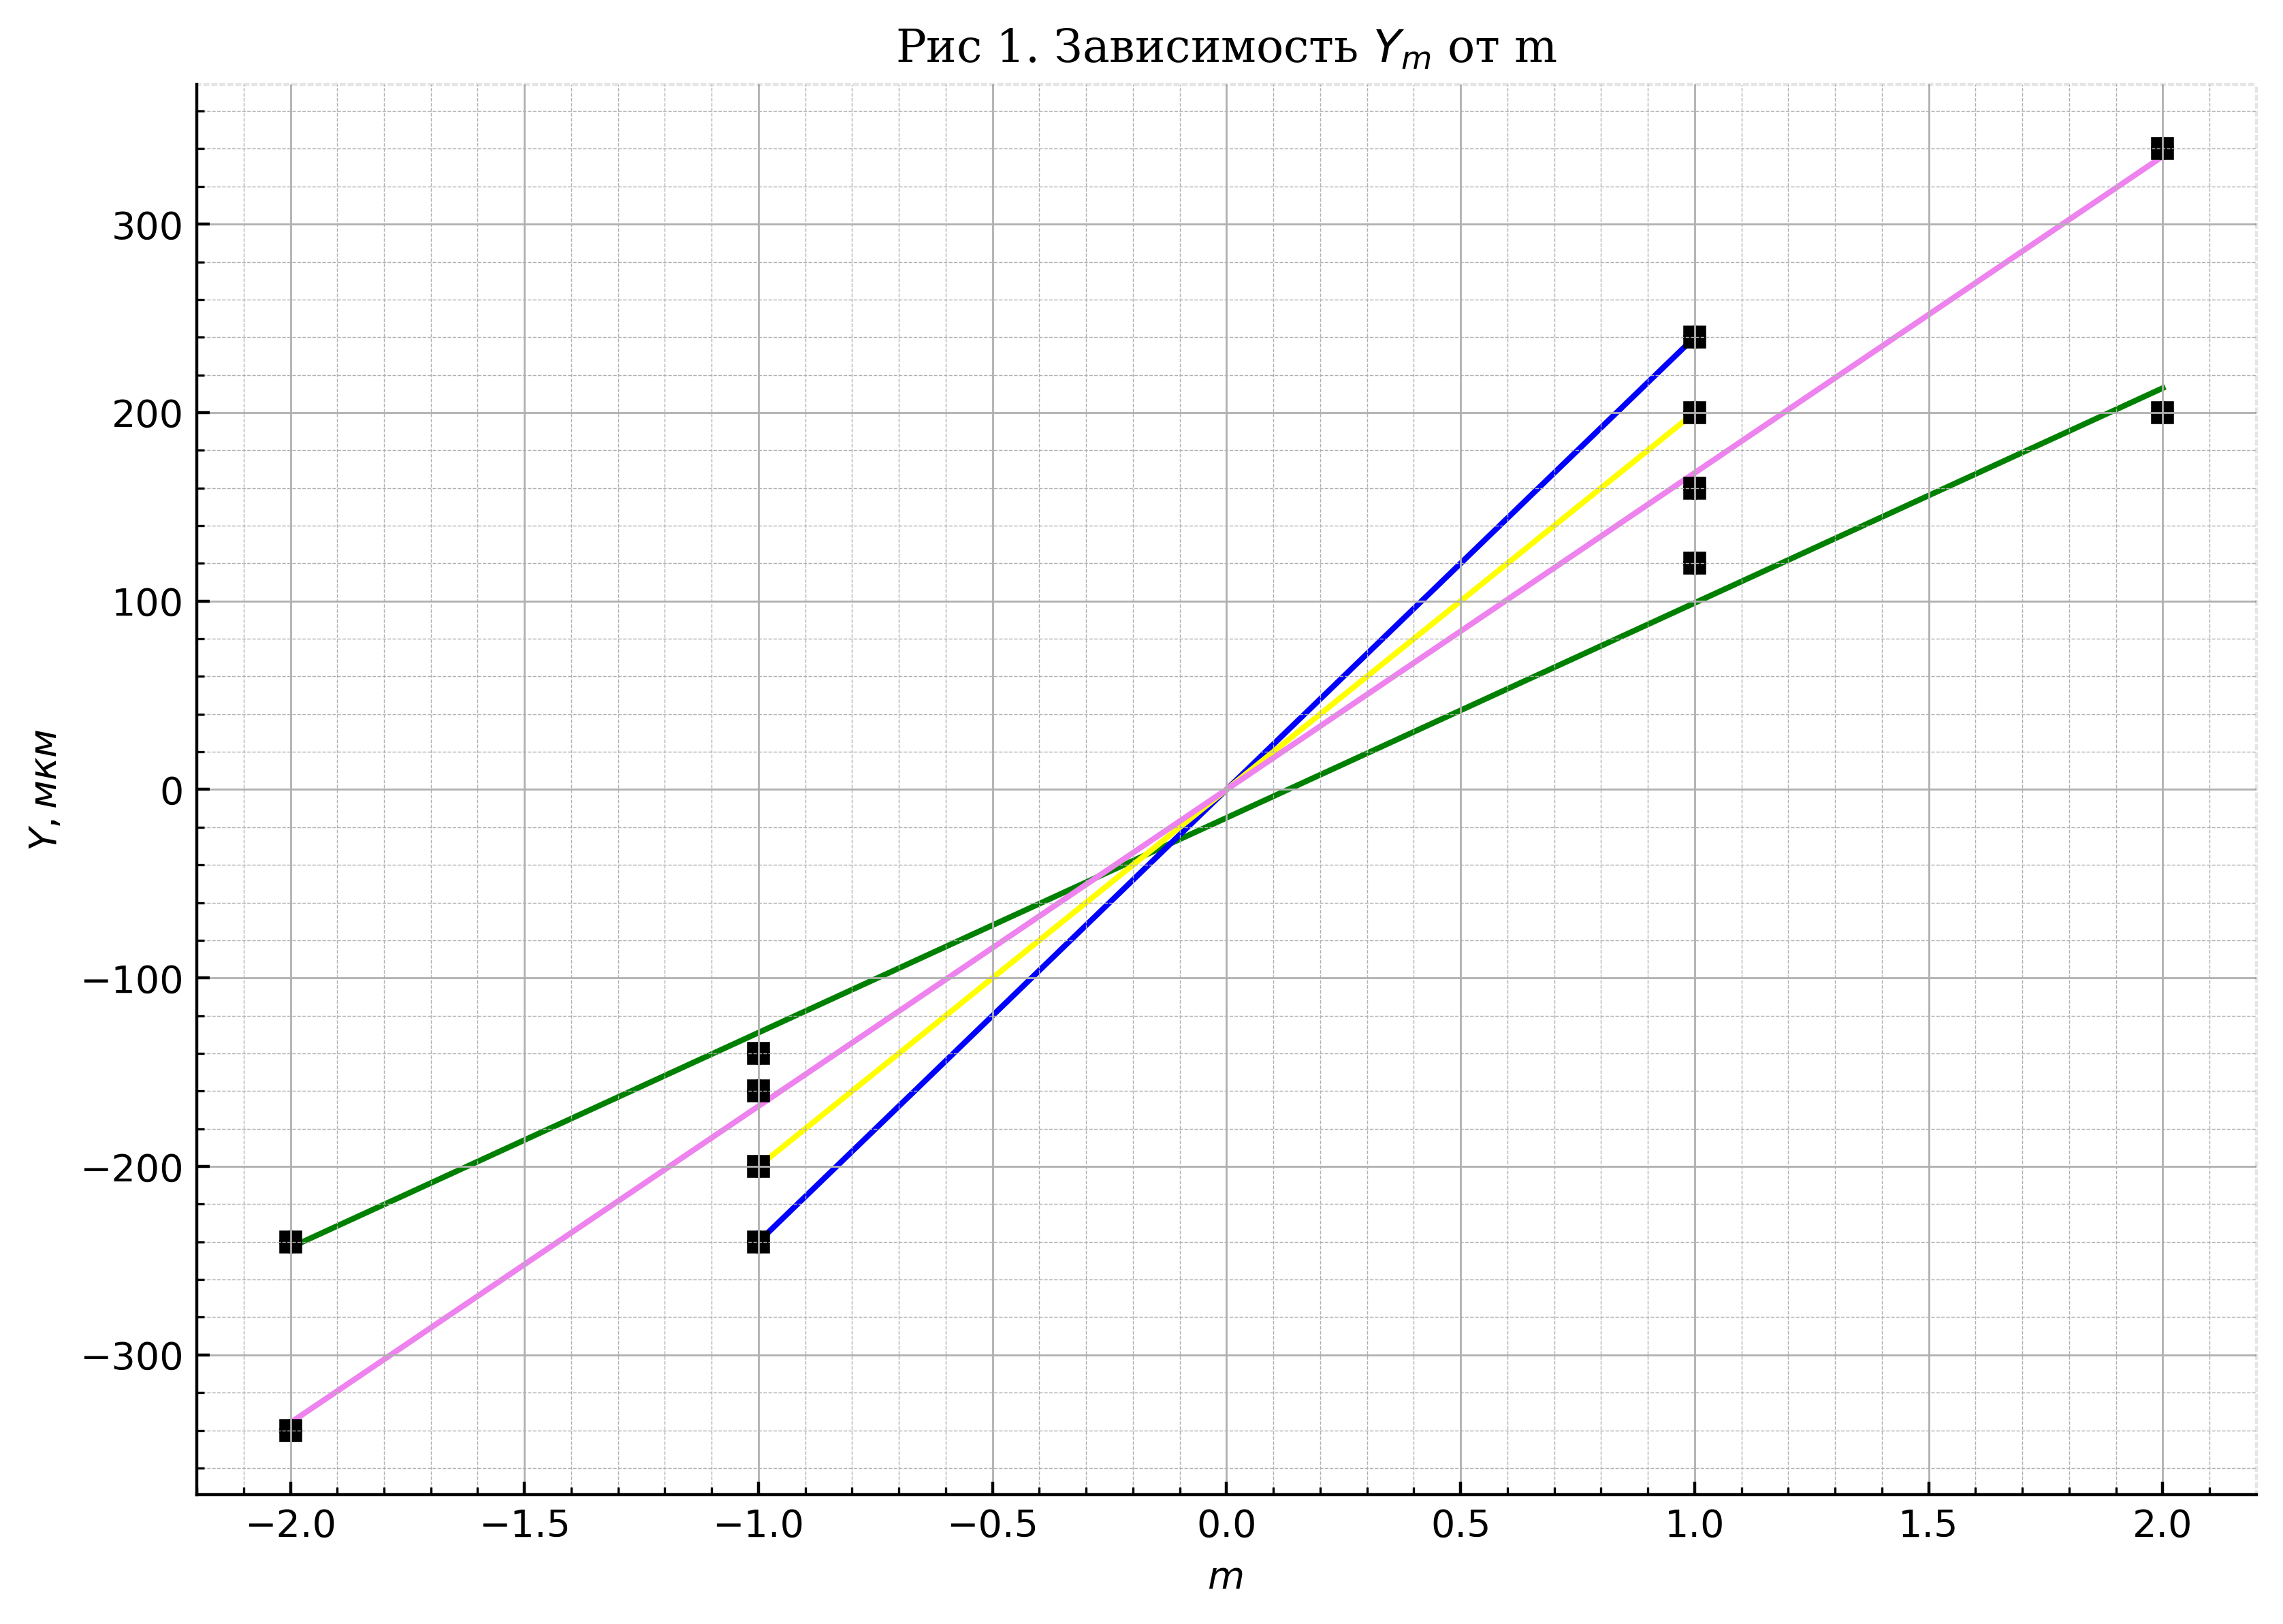

In [2]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость $Y_m$ от m')
mg.set_label(ax, r'$m$ ', r'$Y, мкм$')

f = 0.28
lam = 6400e-10

X = np.array([-2, -1, 1, 2])
Y = np.array([-60*4, -35*4, 30*4, 50*4])
mg.draw_errorbar(ax, X, Y, x_err=0, y_err=0, label='995kHz')
mg.linls(X, Y)
mg.display_linls(ax, color='green')
Lam = f * lam / (mg.last_k / 1e6)
print(f'Lambda, last_k = {Lam}, {mg.last_k}')
print(f'v = {Lam * 995*1e3}')

X = np.array([-1, 1])
Y = np.array([-60*4, +60*4])
mg.draw_errorbar(ax, X, Y, x_err=0, y_err=0, label='1.96MHz')
mg.linls(X, Y)
mg.display_linls(ax, color='blue')
Lam = f * lam / (mg.last_k / 1e6)
print(f'Lambda, last_k = {Lam}, {mg.last_k}')
print(f'v = {Lam * 1.96*1e6}')

X = np.array([-1, 1])
Y = np.array([-50*4, +50*4])
mg.draw_errorbar(ax, X, Y, x_err=0, y_err=0, label='1.52MHz')
mg.linls(X, Y)
mg.display_linls(ax, color='yellow')
Lam = f * lam / (mg.last_k / 1e6)
print(f'Lambda, last_k = {Lam}, {mg.last_k}')
print(f'v = {Lam*1.52*1e6}')

X = np.array([-2, -1, 1, 2])
Y = np.array([-85*4, -40*4, +40*4, 85*4])
mg.draw_errorbar(ax, X, Y, x_err=0, y_err=0, label='1.19MHz')
mg.linls(X, Y)
mg.display_linls(ax, color='violet')
Lam = f * lam / (mg.last_k / 1e6)
print(f'Lambda, last_k = {Lam}, {mg.last_k}')
print(f'v = {Lam*1.19*1e6}')

# ax.legend()

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("1.tsv", sep='\t')
df

,"nu, MHz",x1,xn,n
0,1.00,0.18,3.44,12
1,1.22,0.18,3.44,14
2,1.31,0.16,2.10,10
3,1.43,0.06,2.06,11
4,1.55,0.00,1.70,11
5,1.74,0.08,1.66,11
6,1.86,0.00,1.50,10


0    0.000012
1    0.000010
2    0.000009
3    0.000008
4    0.000007
5    0.000006
6    0.000007
dtype: float64
Коэффиценты прямой: k, s_k, b, s_b
12.520851984730458	0.9959152098637145	-6.869837839251883e-07	1.460829164014511e-07


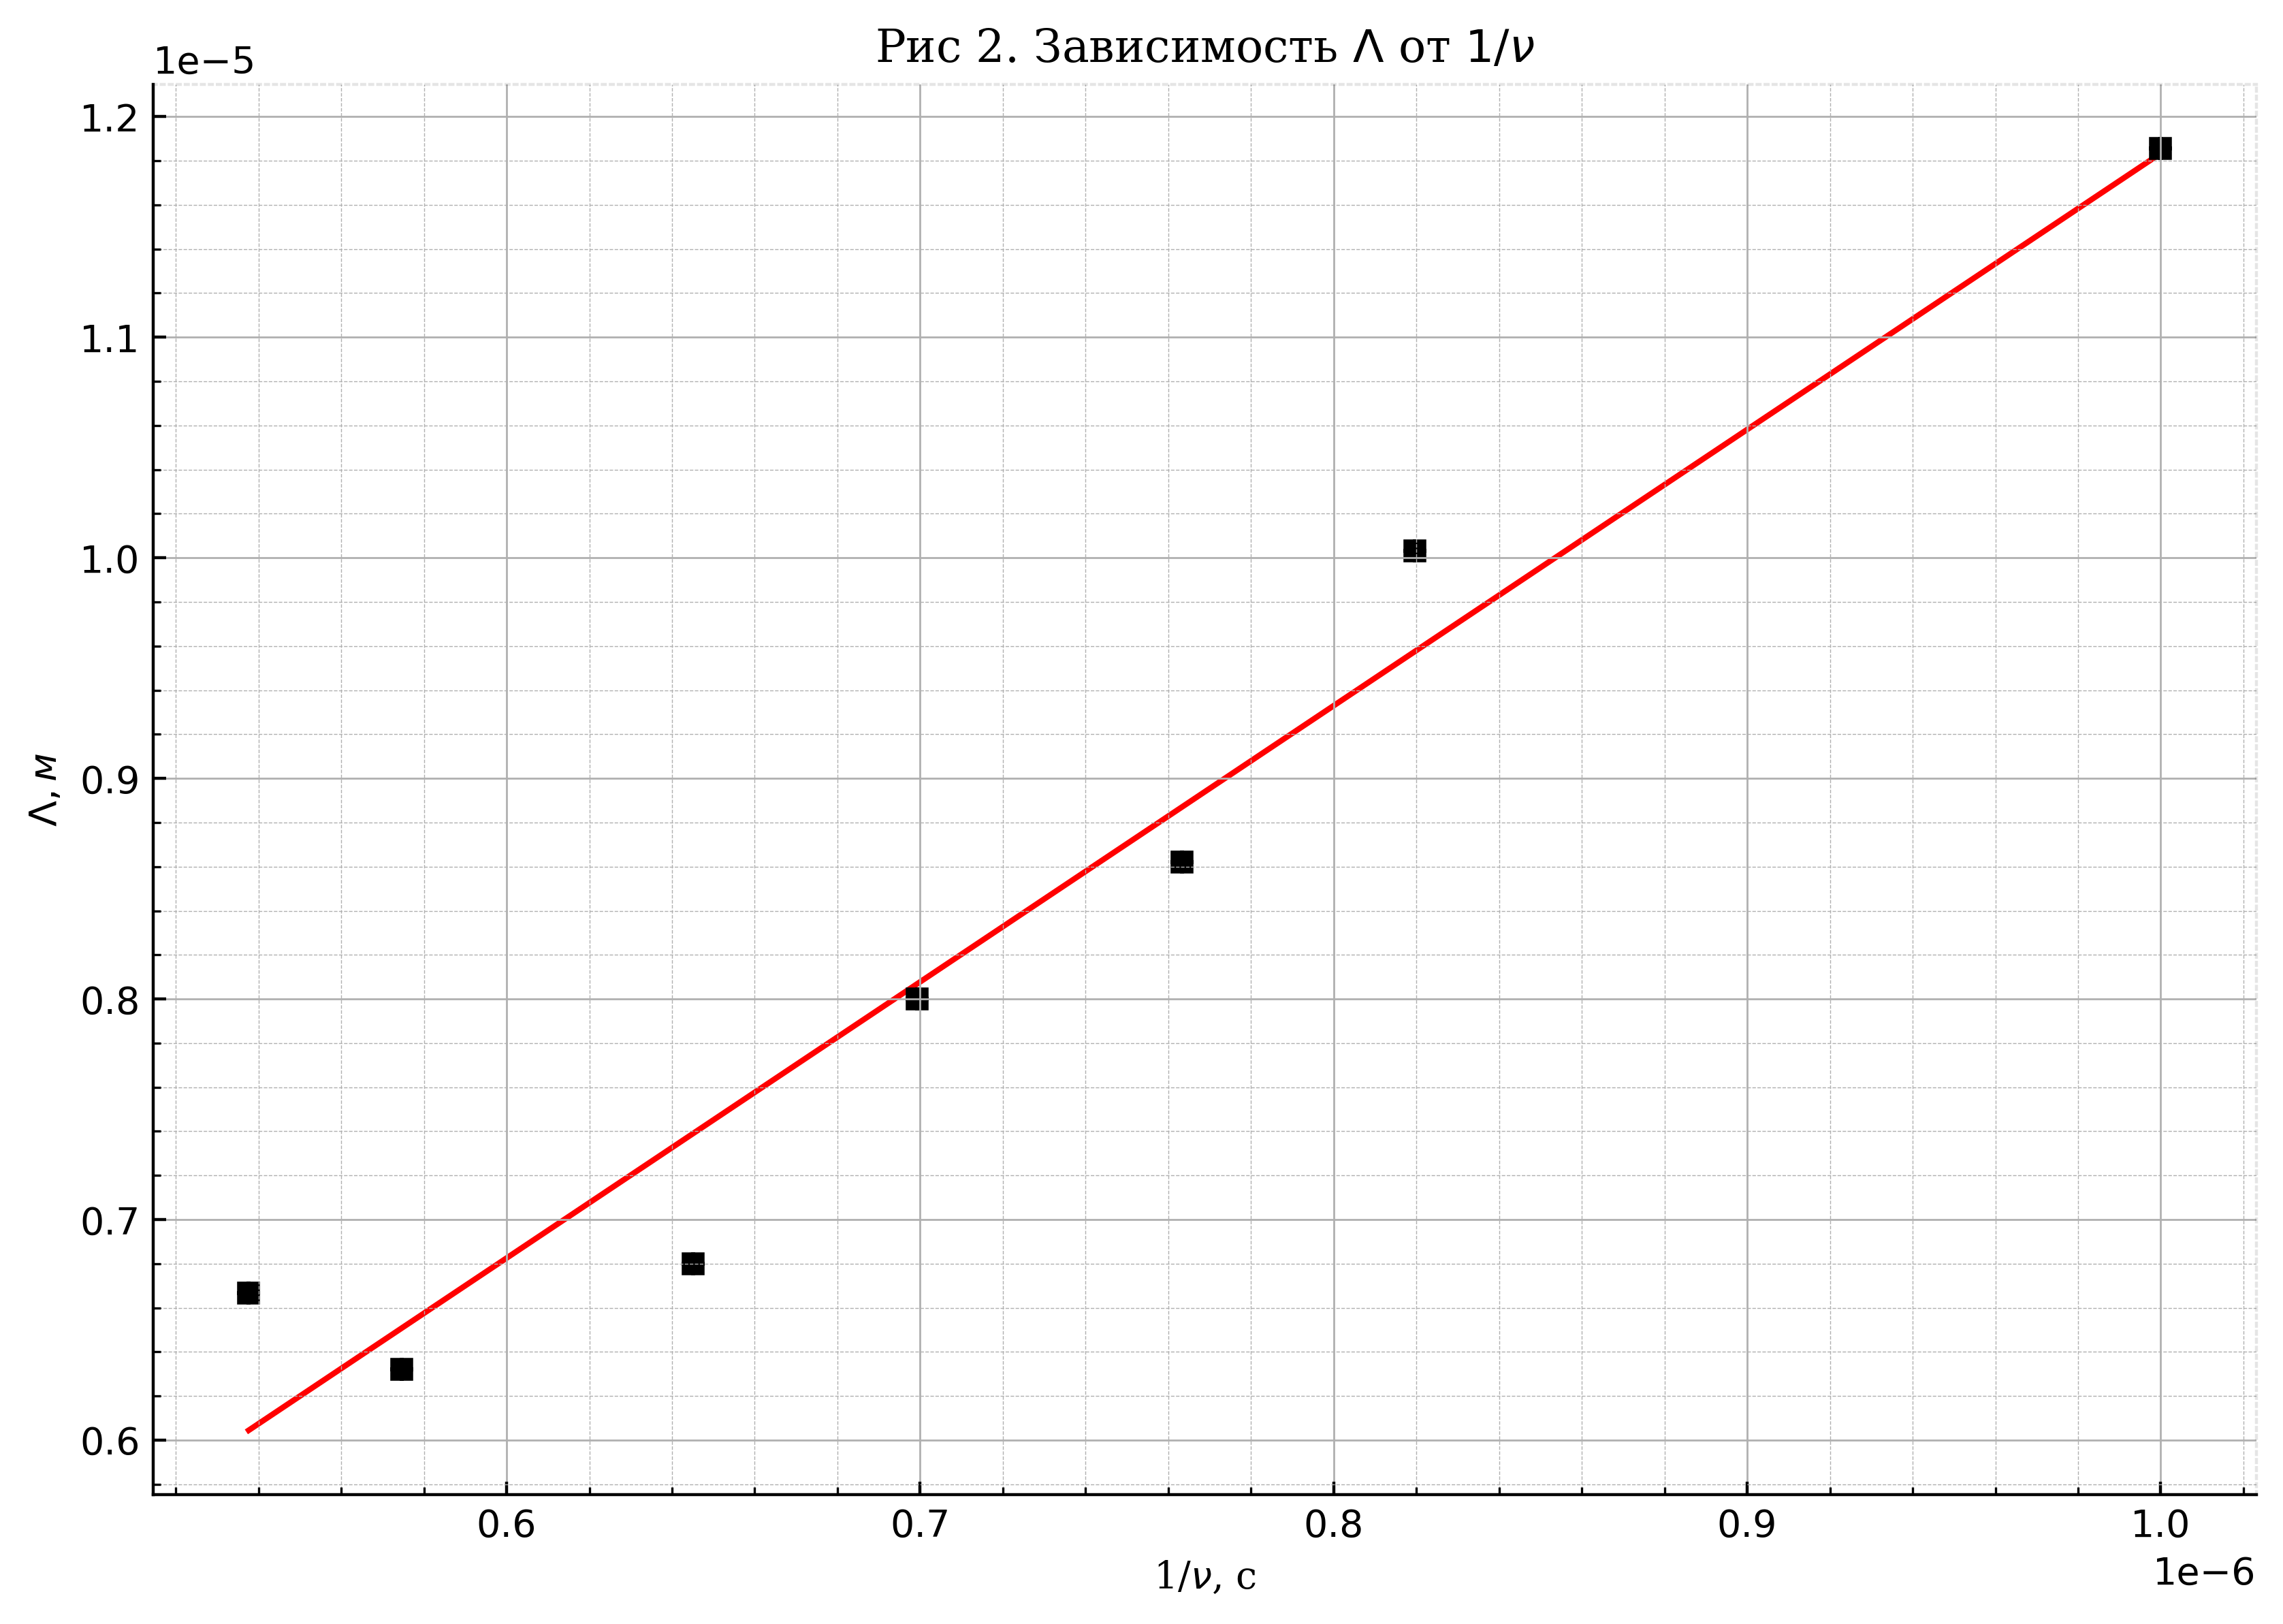

In [5]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость $\Lambda$ от $1/\nu$')
mg.set_label(ax, r'1/$\nu$, с', r'$\Lambda, м$')

Lams = 2 * 0.02 * 1e-3 * (df['xn'] - df['x1']) / (df['n'] - 1)
print(Lams)

X = np.array(1/df['nu, MHz']/1e6)
Y = np.array(Lams)
mg.draw_errorbar(ax, X, Y, x_err=0, y_err=0)
mg.linls(X, Y)
mg.display_linls(ax)